In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("data\\avocado.csv")
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

# Part A. Data Preprocessing

## A1. Drop dummy data
- Some columns are meaningless, which can not be computed in learning model. So, we need to drop meaningless features to make sure all remaining data can be input to training model

In [3]:
df = df.drop("Unnamed: 0", axis=1)

In [4]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

## A2. Relationship Overview

In [5]:
df["Date"]

0        2015-12-27
1        2015-12-20
2        2015-12-13
3        2015-12-06
4        2015-11-29
            ...    
18244    2018-02-04
18245    2018-01-28
18246    2018-01-21
18247    2018-01-14
18248    2018-01-07
Name: Date, Length: 18249, dtype: object

In [6]:
df["Date"] = pd.to_datetime(df["Date"], format='%Y.%m.%d')

C:\Users\Thomas\AppData\Local\Temp\ipykernel_21172\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

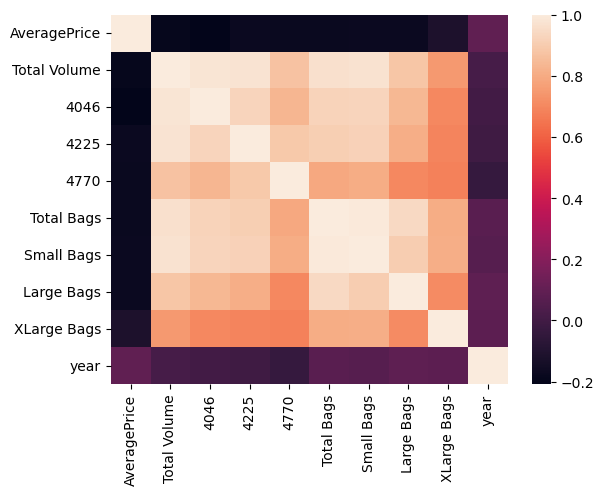

In [7]:
sns.heatmap(df.corr())

C:\Users\Thomas\AppData\Local\Temp\ipykernel_21172\416628308.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['AveragePrice'].sort_values()[:-1].plot(kind='bar')


<Axes: >

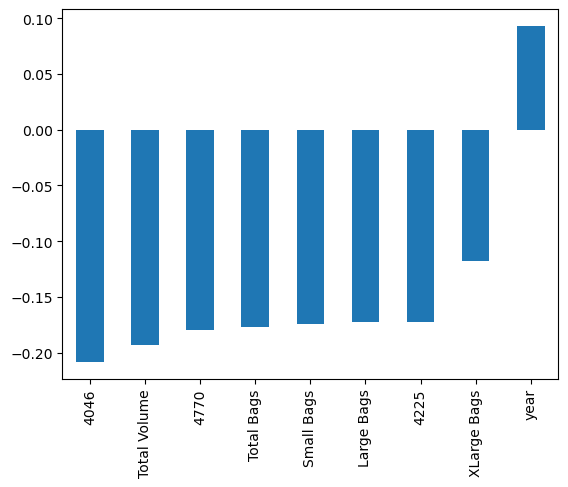

In [8]:
df.corr()['AveragePrice'].sort_values()[:-1].plot(kind='bar')

## A3. Feature mining

In [9]:
from sklearn import preprocessing

### Part A3.1 Handling date

C:\Users\Thomas\AppData\Local\Temp\ipykernel_21172\1949331562.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['AveragePrice'].sort_values()[:-1].plot(kind='bar')


<Axes: >

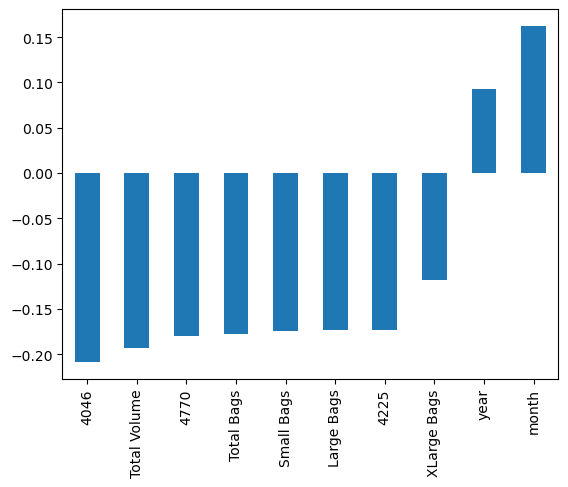

In [10]:
df['month'] = df["Date"].dt.month
df.corr()['AveragePrice'].sort_values()[:-1].plot(kind='bar')

C:\Users\Thomas\AppData\Local\Temp\ipykernel_21172\3633881189.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['AveragePrice'].sort_values()[:-1].plot(kind='bar')


<Axes: >

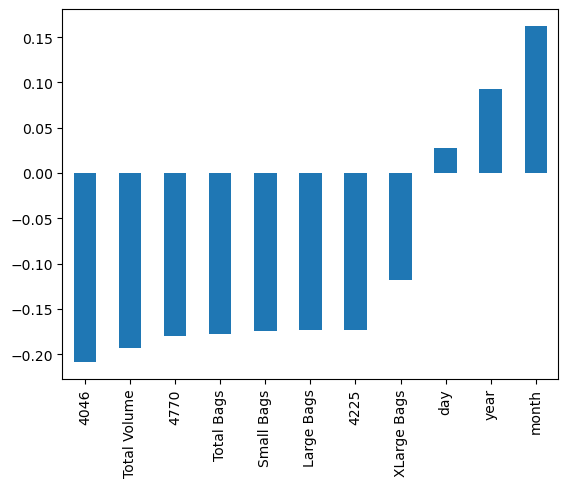

In [11]:
df['day'] = df["Date"].dt.day
df.corr()['AveragePrice'].sort_values()[:-1].plot(kind='bar')

### Part A3.2 Label Encoding
- Training model can only handle numbers i.e. float, double, int etc
- we must convert all data to a readable format
- e.g. catagory format --> number

In [12]:
print("Number of unique items in region: %d"%len(df['region'].unique()))

Number of unique items in region: 54


In [13]:
region_val = df['region'].unique()
le_region = preprocessing.LabelEncoder()
le_region.fit(region_val)
temp = np.unique(le_region.transform(df['region']))
size = len(temp)
print(temp)
print("Number of unique items in region: %d"%size)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53]
Number of unique items in region: 54


We simply convert catogorical data to number, but it is not effiecient in machine learning with following reasones:
- The basic function of neurons is explained by wb+k
- b is the input number after conversion
- Linear relationship can't explain the number. Of course, some complex neuron function can explain the meaning, but we need to apply same function to other neurons during training

One Hot Encoder is a better solution in machine learning, it convert catogorical number into boolean cases. For example, we have fruit catagory. Banana, Apple and Melon are unique data in this feature.
- we add 3 feature with is_apple, is_banana and is_melon
- f(x) = wb+k can explain this feature easily
- f(0): No apple, the function only output k
- f(1): Have apple, importance of neuron can affect the model directly

In [14]:
enc = preprocessing.OneHotEncoder()
enc_data = pd.DataFrame(enc.fit_transform(
    df[['region', 'type']]).toarray())
enc_data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
df = df.join(enc_data)

In [16]:
df.head(1)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,...,46,47,48,49,50,51,52,53,54,55
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


C:\Users\Thomas\AppData\Local\Temp\ipykernel_21172\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

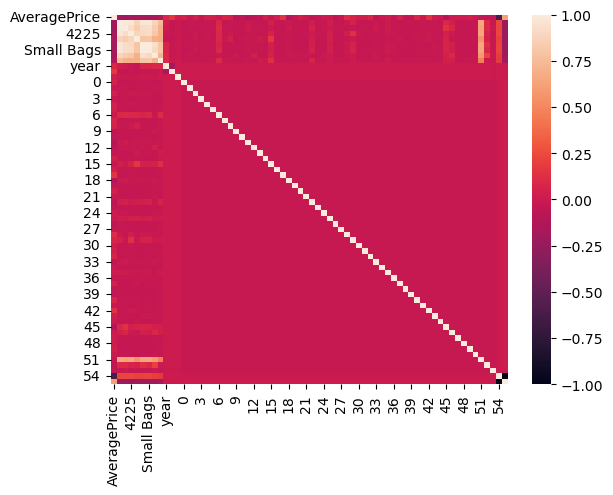

In [17]:
sns.heatmap(df.corr())

C:\Users\Thomas\AppData\Local\Temp\ipykernel_21172\770468296.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['AveragePrice'].sort_values()[:-1].plot(kind='bar')


<Axes: >

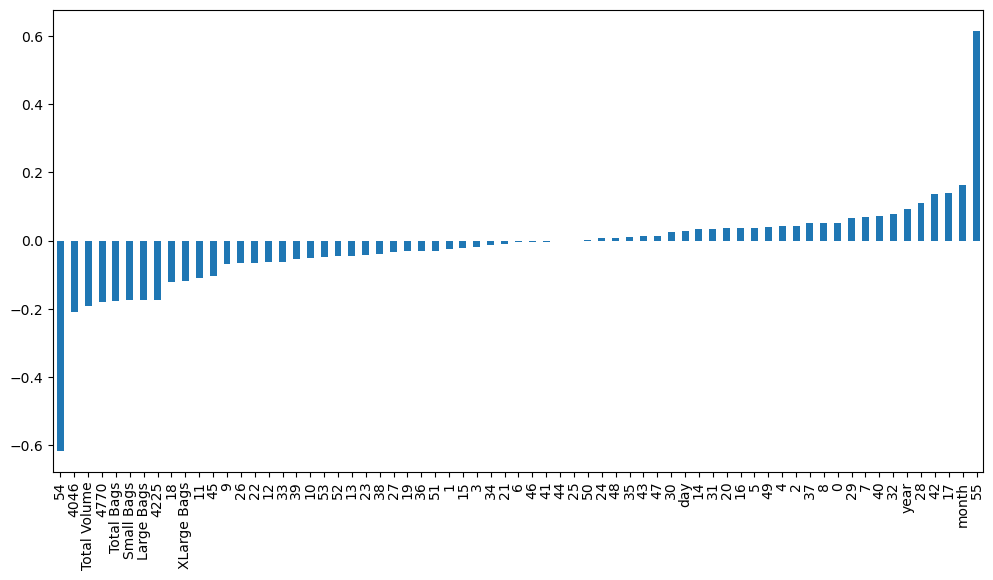

In [18]:
plt.figure(figsize=(12,6))
df.corr()['AveragePrice'].sort_values()[:-1].plot(kind='bar')

### Part A3.4 Split Data

In [19]:
df = df.drop("Date", axis=1)

In [20]:
df = df.drop("region", axis = 1)

In [21]:
df = df.drop("type", axis = 1)

In [22]:
X = df.drop('AveragePrice', axis = 1).values
y = df['AveragePrice'].values

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

### Part A3.5 Scaling the data

In [24]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [25]:
X_train.shape

(13686, 67)

## Part 4. Building Model

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf

In [57]:
model = Sequential()

model.add(Dense(67, activation='relu'))
model.add(Dense(34, activation='relu'))
model.add(Dense(17, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss=tf.keras.losses.MAE)

In [58]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/100
428/428 [==============================] - 2s 4ms/step - loss: 0.4721 - val_loss: 0.4468
Epoch 2/100
428/428 [==============================] - 1s 3ms/step - loss: 0.4484 - val_loss: 0.4468
Epoch 3/100
428/428 [==============================] - 1s 3ms/step - loss: 0.4484 - val_loss: 0.4468
Epoch 4/100
428/428 [==============================] - 1s 3ms/step - loss: 0.4484 - val_loss: 0.4468
Epoch 5/100
428/428 [==============================] - 1s 3ms/step - loss: 0.4484 - val_loss: 0.4468
Epoch 6/100
428/428 [==============================] - 1s 3ms/step - loss: 0.4449 - val_loss: 0.4407
Epoch 7/100
428/428 [==============================] - 3s 7ms/step - loss: 0.4423 - val_loss: 0.4406
Epoch 8/100
428/428 [==============================] - 2s 5ms/step - loss: 0.4418 - val_loss: 0.4403
Epoch 9/100
428/428 [==============================] - 2s 5ms/step - loss: 0.4415 - val_loss: 0.4396
Epoch 10/100
428/428 [==============================] - 1s 3ms/step - loss: 0.4409 - val_lo

428/428 [==============================] - 1s 3ms/step - loss: 0.4363 - val_loss: 0.4366
Epoch 82/100
428/428 [==============================] - 1s 3ms/step - loss: 0.4363 - val_loss: 0.4364
Epoch 83/100
428/428 [==============================] - 3s 7ms/step - loss: 0.4363 - val_loss: 0.4366
Epoch 84/100
428/428 [==============================] - 2s 4ms/step - loss: 0.4364 - val_loss: 0.4364
Epoch 85/100
428/428 [==============================] - 1s 3ms/step - loss: 0.4362 - val_loss: 0.4363
Epoch 86/100
428/428 [==============================] - 1s 3ms/step - loss: 0.4363 - val_loss: 0.4364
Epoch 87/100
428/428 [==============================] - 1627s 4s/step - loss: 0.4361 - val_loss: 0.4365
Epoch 88/100
428/428 [==============================] - 3s 6ms/step - loss: 0.4362 - val_loss: 0.4365
Epoch 89/100
428/428 [==============================] - 1s 3ms/step - loss: 0.4362 - val_loss: 0.4362
Epoch 90/100
428/428 [==============================] - 2s 4ms/step - loss: 0.4362 - val_loss

In [52]:
losses = pd.DataFrame(model.history.history)

<Axes: >

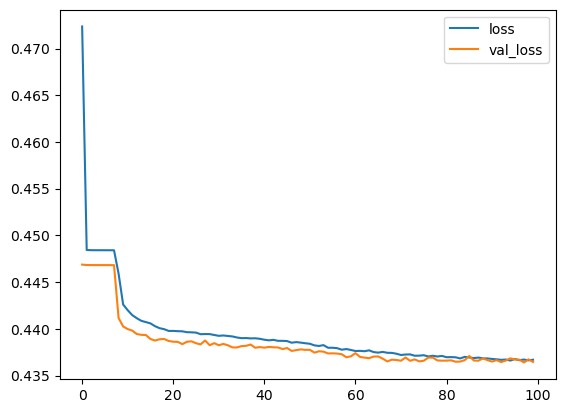

In [53]:
losses.plot()

In [54]:
np.mean(y)

1.405978409775878

## A4. Handle Date

In [64]:
df = pd.read_csv("data\\avocado.csv")

In [72]:
date_time= pd.to_datetime(df["Date"], format='%Y.%m.%d')
timestamp_s = date_time.map(pd.Timestamp.timestamp)
timestamp_s = timestamp_s.sort_values()
print(timestamp_s)

11569    1.420330e+09
9593     1.420330e+09
10009    1.420330e+09
1819     1.420330e+09
9333     1.420330e+09
             ...     
8574     1.521936e+09
9018     1.521936e+09
18141    1.521936e+09
17673    1.521936e+09
8814     1.521936e+09
Name: Date, Length: 18249, dtype: float64


In [73]:
day = 24*60*60
year = (365.2425)*day
print(year)

31556952.0


Text(0.5, 1.0, 'Time of day signal')

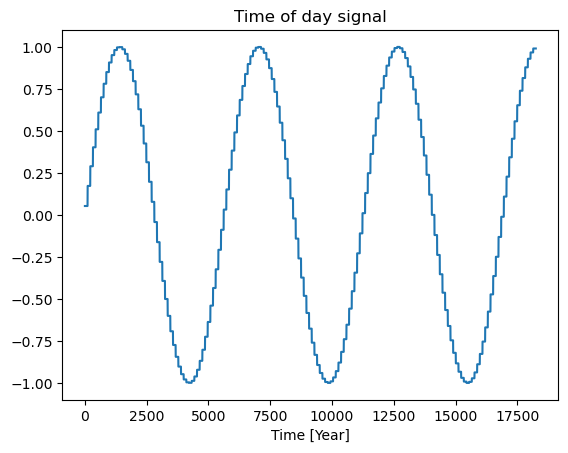

In [76]:
day = 24*60*60
year = (365.2425)*day
sin_val = np.sin(timestamp_s * (2 * np.pi / year))
cos_val = np.cos(timestamp_s * (2 * np.pi / year))
plt.plot(np.array(sin_val))
plt.xlabel('Time [Year]')
plt.title('Time of day signal')

In [ ]:
df.sort_values("Date").head(20)